## Multi label Classification

place these lines of code at the top of each notebook to get reload and matplotlib to be inline

In [67]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import fastai libs

In [68]:
from fastai.conv_learner import *

In [69]:
PATH = '/fastai/data/planet/'

In [70]:
ls {PATH}

test-jpg/        tmp/           train-jpg.tar.7z
test-jpg.tar     train-jpg/     train_v2.csv
test-jpg.tar.7z  train-jpg.tar  train_v2.csv.zip


## Multi Label vs Single label

import plotting libs from fastai

In [71]:
from fastai.plots import *

write a function get first in files list

In [72]:
def get_1st(path): return glob(f'{path}/*.*')[0]

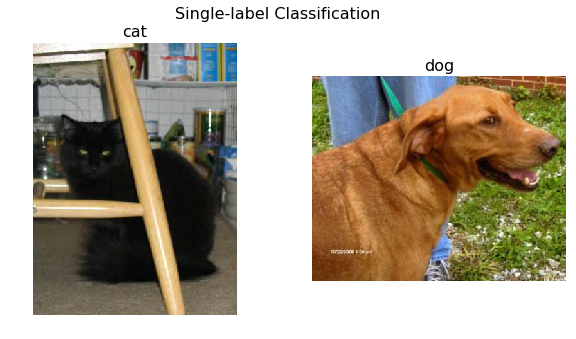

In [73]:
dc_path = '/fastai/data/dogscats/valid/'
list_paths =  [get_1st(f"{dc_path}cats"),get_1st(f"{dc_path}dogs")]
plots_from_files(list_paths,titles=["cat","dog"],maintitle="Single-label Classification")

In single lable classification each sample belongs to one class. In the example above each image is either cat or dog.

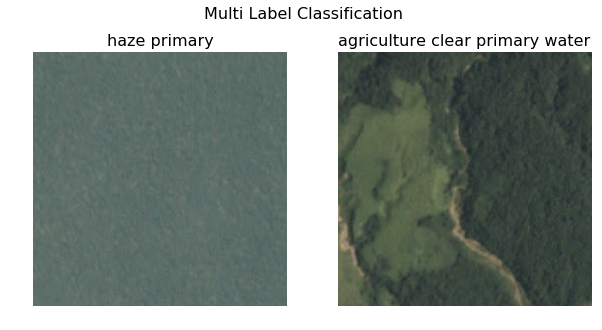

In [74]:
list_paths = [f"{PATH}train-jpg/train_0.jpg",f"{PATH}train-jpg/train_1.jpg"]
titles = ["haze primary", "agriculture clear primary water"]
plots_from_files(list_paths,titles=titles,maintitle = "Multi Label Classification")

In multi-label classification each sample can belong to one or more classes. In the previous example, the first images belongs to two classes: haze and primary. The second image belongs to four classes: agriculture, clear, primary and water.

## Multi label models for Planet dataset

In [75]:
from planet import f2

metrics = [f2]
f_model = resnet34

In [76]:
label_csv = f'{PATH}train_v2.csv'
n = len(list(open(label_csv))) - 1
val_idxs =  get_cv_idxs(n)

Different set of data augmentation is used for this classification as it deals with Satellite images. It also allows vertical flips. As sat images vertical orientation wouldnt affect classification much.

In [77]:
def get_data(sz):
    tfms = tfms_from_model(f_model,sz,aug_tfms=transforms_top_down,max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH,'train-jpg',label_csv,tfms=tfms,
                                       suffix='.jpg',val_idxs=val_idxs,test_name='test-jpg')

In [78]:
data = get_data(256)

In [79]:
x,y = next(iter(data.val_dl))

In [80]:
x


( 0 , 0 ,.,.) = 
 -1.2959 -1.2274 -1.1418  ...  -1.3130 -1.2103 -1.0904
 -1.2445 -1.2103 -1.1418  ...  -1.3987 -1.3644 -1.2788
 -1.1932 -1.1760 -1.1418  ...  -1.3987 -1.4500 -1.4329
           ...             ⋱             ...          
 -0.5253 -0.4739 -0.4054  ...  -0.8335 -0.6965 -0.5767
 -0.5596 -0.4911 -0.4054  ...  -0.7137 -0.5767 -0.4739
 -0.5767 -0.4911 -0.4054  ...  -0.6281 -0.5082 -0.4054

( 0 , 1 ,.,.) = 
 -0.9503 -0.9153 -0.8452  ...  -1.0728 -1.0028 -0.8978
 -0.9328 -0.8978 -0.8452  ...  -1.1253 -1.0728 -0.9678
 -0.9153 -0.8803 -0.8452  ...  -1.1604 -1.1253 -1.0553
           ...             ⋱             ...          
 -0.3025 -0.2675 -0.2150  ...  -0.4951 -0.4076 -0.3375
 -0.3200 -0.2850 -0.2325  ...  -0.4251 -0.3375 -0.2675
 -0.3375 -0.3025 -0.2325  ...  -0.4076 -0.3200 -0.2500

( 0 , 2 ,.,.) = 
 -0.8284 -0.8110 -0.7587  ...  -0.9504 -0.8633 -0.7587
 -0.7936 -0.7761 -0.7587  ...  -0.9853 -0.9504 -0.8807
 -0.7413 -0.7413 -0.7413  ...  -0.9678 -0.9853 -0.9504
           

In [81]:
y


    1     0     0  ...      0     0     1
    1     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
       ...          ⋱          ...       
    0     0     0  ...      0     0     1
    1     0     0  ...      0     0     0
    1     0     0  ...      0     0     0
[torch.cuda.FloatTensor of size 64x17 (GPU 0)]

In [88]:
y[63]


 1
 0
 0
 0
 0
 1
 0
 0
 0
 0
 0
 0
 1
 0
 0
 0
 0
[torch.cuda.FloatTensor of size 17 (GPU 0)]

In [84]:
data.classes

['agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water']

In [117]:
list(zip(data.classes,y[5]))

[('agriculture', 0.0),
 ('artisinal_mine', 0.0),
 ('bare_ground', 0.0),
 ('blooming', 0.0),
 ('blow_down', 0.0),
 ('clear', 1.0),
 ('cloudy', 0.0),
 ('conventional_mine', 0.0),
 ('cultivation', 0.0),
 ('habitation', 0.0),
 ('haze', 0.0),
 ('partly_cloudy', 0.0),
 ('primary', 1.0),
 ('road', 0.0),
 ('selective_logging', 0.0),
 ('slash_burn', 0.0),
 ('water', 0.0)]

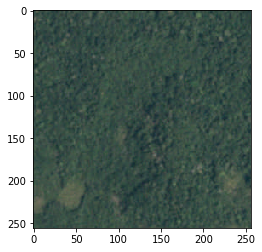

In [118]:
plt.imshow(data.val_ds.denorm(to_np(x))[5]* 1.4);

In [29]:
sz=64

In [30]:
data = get_data(sz)

In [31]:
data = data.resize(int(sz*1.3),'tmp')

In [36]:
learn = ConvLearner.pretrained(f_model,data,metrics=metrics)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:04<00:00, 19875169.72it/s]


epoch      trn_loss   val_loss   f2                          
    0      0.214402   0.319602   0.824827  



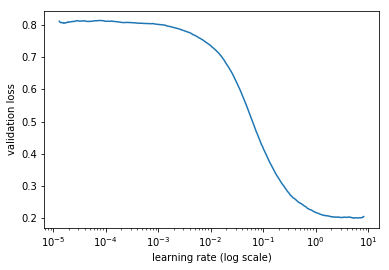

In [37]:
lrf= learn.lr_find()
learn.sched.plot()

In [38]:
lr = 0.2

In [39]:
learn.fit(lr,3,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   f2                          
    0      0.148094   0.133508   0.881589  
    1      0.144939   0.128094   0.888272                    
    2      0.137326   0.12583    0.891399                    
    3      0.138506   0.125504   0.890476                    
    4      0.135386   0.12248    0.894784                    
    5      0.131764   0.121693   0.895658                    
    6      0.135972   0.121314   0.896588                    



[array([0.12131]), 0.8965878245328742]

In [41]:
lrs = np.array([lr/9,lr/3,lr])

In [42]:
learn.unfreeze()
learn.fit(lrs,3,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   f2                          
    0      0.121146   0.10854    0.909858  
    1      0.116436   0.105508   0.911923                    
    2      0.109202   0.100406   0.915049                    
    3      0.111055   0.1035     0.914584                    
    4      0.106455   0.099297   0.91664                     
    5      0.101745   0.096619   0.919633                    
    6      0.099254   0.096391   0.919468                     



[array([0.09639]), 0.9194684102872698]

In [43]:
learn.save(f'{sz}')

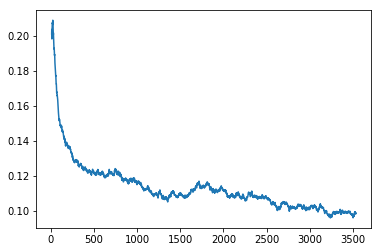

In [44]:
learn.sched.plot_loss()

In [45]:
sz=128

In [47]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr,3,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   f2                           
    0      0.101403   0.095552   0.918078  
    1      0.09743    0.093728   0.919659                     
    2      0.096702   0.094044   0.919033                     
    3      0.097404   0.093281   0.919867                     
    4      0.095198   0.092799   0.920423                     
    5      0.093849   0.092094   0.921273                     
    6      0.09497    0.092321   0.920217                     



[array([0.09232]), 0.9202168483365788]

In [48]:
learn.unfreeze()
learn.fit(lrs,3,cycle_len=1,cycle_mult=2)
learn.save(f'{sz}')

epoch      trn_loss   val_loss   f2                           
    0      0.093187   0.0867     0.927965  
    1      0.093178   0.087534   0.926673                     
    2      0.088952   0.084684   0.929975                     
    3      0.095175   0.0885     0.927147                     
    4      0.089285   0.084716   0.929927                     
    5      0.083767   0.084209   0.928831                     
    6      0.083925   0.083532   0.930503                     



In [49]:
sz=256
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr,3,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   f2                           
    0      0.090701   0.08805    0.926016  
    1      0.089848   0.087413   0.92667                      
    2      0.093145   0.086986   0.927134                     
    3      0.089605   0.086595   0.927016                     
    4      0.090095   0.085921   0.928171                     
    5      0.08865    0.085992   0.927663                     
    6      0.087063   0.085922   0.927592                     



[array([0.08592]), 0.9275917224936006]

In [50]:
learn.unfreeze()
learn.fit(lrs,3,cycle_len=1,cycle_mult=2)
learn.save(f'{sz}')

epoch      trn_loss   val_loss   f2                           
    0      0.088393   0.082436   0.931929  
    1      0.08766    0.084109   0.928959                     
    2      0.083131   0.081381   0.932205                     
    3      0.088266   0.084178   0.928883                     
    4      0.085634   0.082859   0.932011                     
    5      0.079171   0.081324   0.933498                     
    6      0.07831    0.081229   0.933622                     



In [51]:
multi_preds,y = learn.TTA()
preds = np.mean(multi_preds,0)

In [52]:
f2(preds,y)

0.9322435191528207

In [53]:
y

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [54]:
y[0]

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.], dtype=float32)

In [110]:
preds.shape

(8095, 17)

In [55]:
preds

array([[0.71303, 0.00166, 0.02839, ..., 0.00565, 0.02322, 0.61485],
       [0.89942, 0.0016 , 0.02198, ..., 0.01053, 0.00325, 0.15566],
       [0.2361 , 0.00037, 0.01666, ..., 0.00206, 0.00172, 0.09273],
       ...,
       [0.00347, 0.00002, 0.00012, ..., 0.00005, 0.00005, 0.01008],
       [0.99521, 0.00005, 0.00146, ..., 0.00033, 0.00054, 0.03935],
       [0.00037, 0.     , 0.00001, ..., 0.00018, 0.00001, 0.00024]], dtype=float32)

In [113]:
list(zip(data.classes,preds[7080]))

[('agriculture', 0.9681977),
 ('artisinal_mine', 6.8039626e-05),
 ('bare_ground', 0.0043934286),
 ('blooming', 0.00070605683),
 ('blow_down', 0.0016206249),
 ('clear', 0.99830246),
 ('cloudy', 1.0590925e-05),
 ('conventional_mine', 4.1806437e-05),
 ('cultivation', 0.35491994),
 ('habitation', 0.01563452),
 ('haze', 0.0014465484),
 ('partly_cloudy', 0.00057536),
 ('primary', 0.9998776),
 ('road', 0.025895411),
 ('selective_logging', 0.0004193713),
 ('slash_burn', 0.007906893),
 ('water', 0.018305695)]

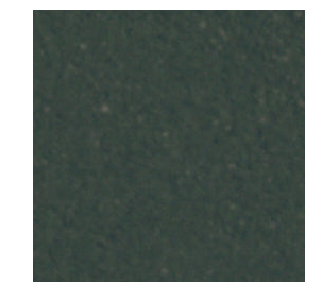

In [114]:
list_paths = [f"{PATH}train-jpg/train_7080.jpg"]

plots_from_files(list_paths)